In [62]:
import librosa
audio_path = '/Users/adithyaram/Desktop/03-01-01-01-01-01-01.wav'
x , sr = librosa.load(audio_path)
# x = waveform
# sr(sample rate) is the number of samples of a signal taken per second
# In the context of audio, sample rate refers to the number of measurements (samples) of the audio waveform taken per second.

In [63]:
import IPython.display as ipd
ipd.Audio(audio_path)

In [64]:
print('x = ',x,"\n")

print('sr= ',sr,"\n")

print(x.shape)

x =  [0. 0. 0. ... 0. 0. 0.] 

sr=  22050 

(72839,)


In [65]:
%matplotlib inline 
# (will be displayed directly below the code cell in which they are executed rather than in a separate window or file)
import matplotlib.pyplot as plt
import sklearn
import librosa.display

librosa.display is used to display the audio files in different formats such as wave plot, spectrogram, or colormap.
Waveplots let us know the loudness of the audio at a given time.
Spectogram shows different frequencies playing at a particular time along with it’s amplitude.

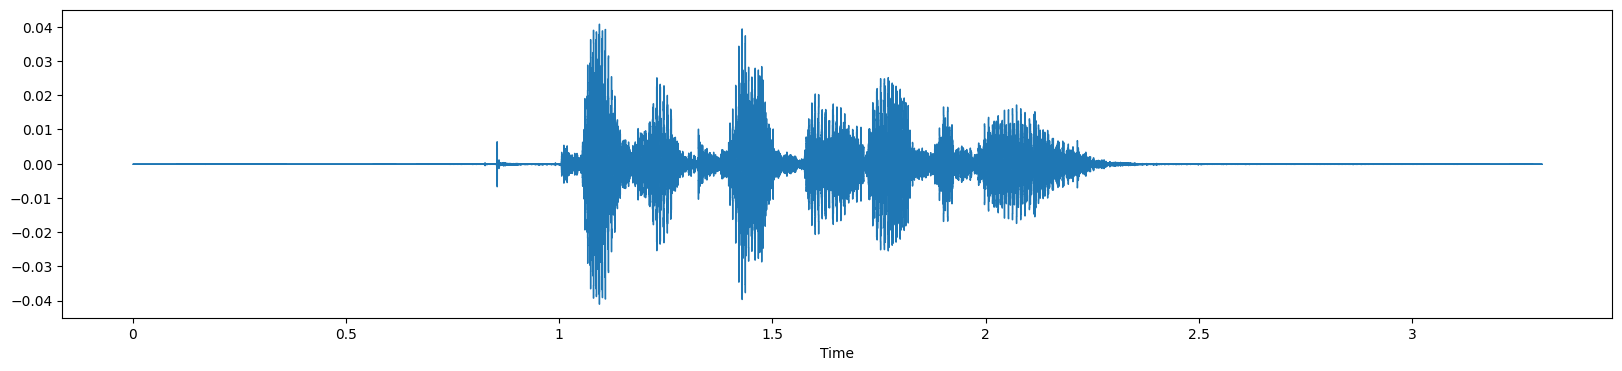

In [66]:
plt.figure(figsize=(20, 4))
librosa.display.waveshow(x,sr=sr)

librosa.display.waveshow is used to plot waveform of amplitude vs time where the first axis is an amplitude and second axis is time.

Above is the plot of the amplitude envelope of a waveform.
Amplitude Envelope of a signal consists of the maximum amplitudes value among all samples in each frame

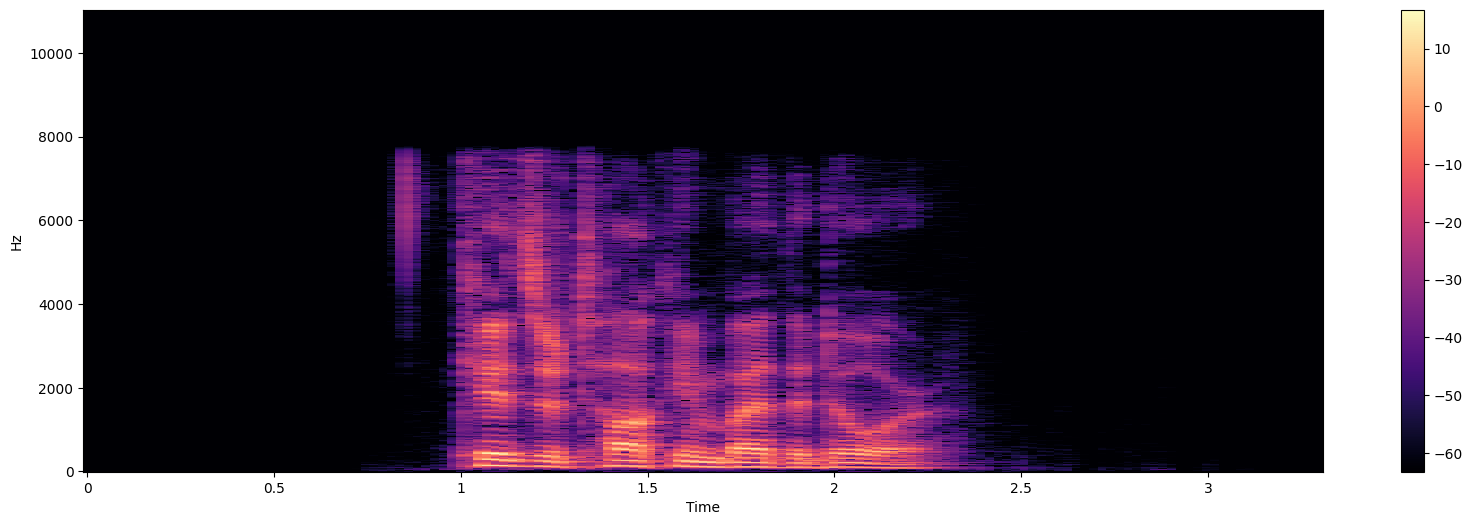

In [67]:
X = librosa.stft(x)
X_db = librosa.amplitude_to_db(abs(X)) # The librosa.amplitude_to_db function is used to convert the magnitude spectrogram to the dB scale.
plt.figure(figsize=(20, 6))
librosa.display.specshow(X_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

A spectrogram is a visual depiction of the spectrum of frequencies of an audio signal as it varies with time. Hence it includes both time and frequency aspects of the signal. It is obtained by applying the Short-Time Fourier Transform (STFT) on the signal. In the simplest of terms, the STFT of a signal is calculated by applying the Fast Fourier Transform (FFT) locally on small time segments of the signal.
Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal. specshow is used to display spectogram.

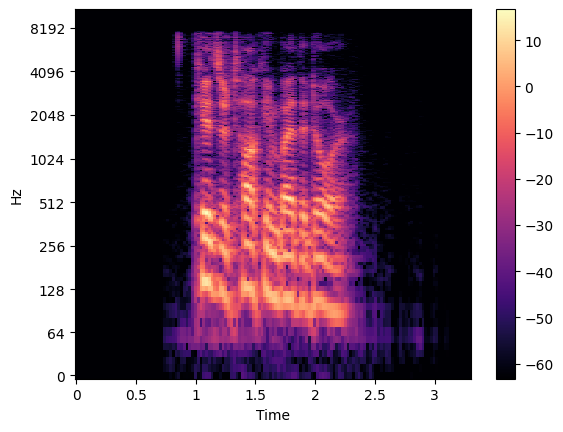

In [68]:
librosa.display.specshow(X_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [69]:
# import numpy as np
# sr = 22050 # sample rate
# T = 5.0    # seconds
# t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
# x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

In [70]:
ipd.Audio(x, rate=sr) # load a NumPy array

In [71]:
import soundfile as sf
sf.write('/Users/adithyaram/Desktop/1.wav', x, sr)

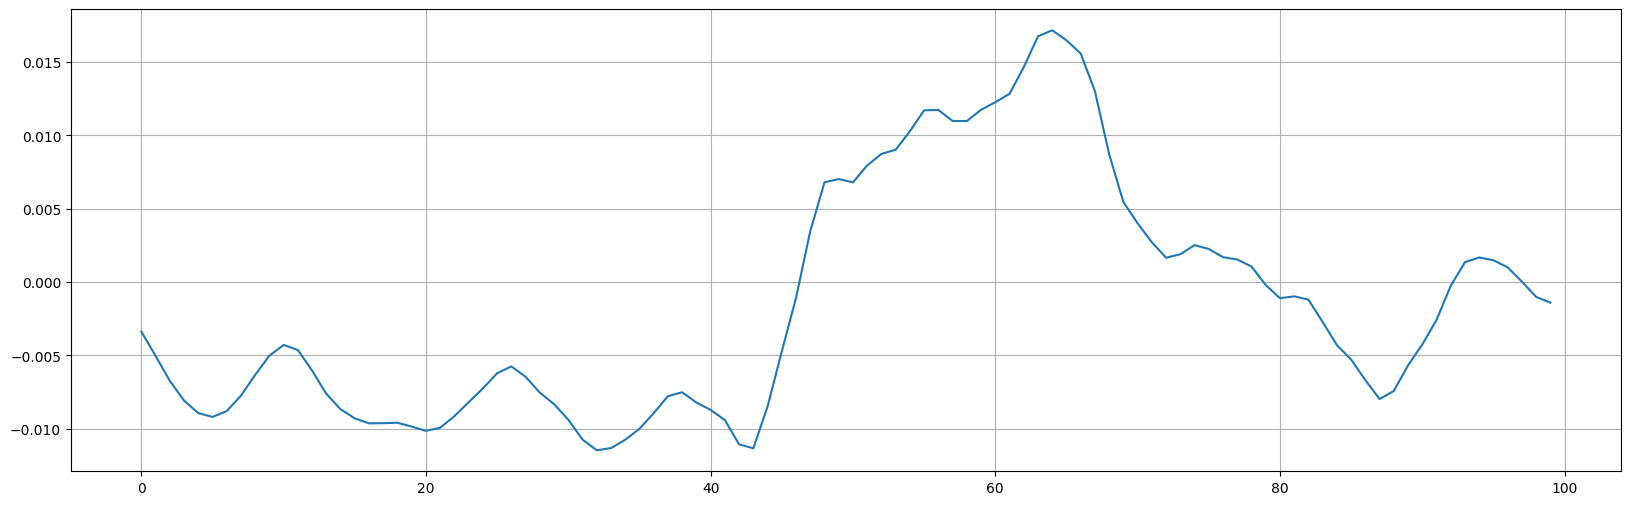

In [72]:
# Zooming in
n0 = 40000
n1 = 40100
plt.figure(figsize=(20, 6))
plt.plot(x[n0:n1])
plt.grid()

In [73]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(zero_crossings.shape)

print(zero_crossings)

(100,)
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False  True False False
 False False  True False]


In [74]:
print(sum(zero_crossings))

4


The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. 
It returns a boolean array of the same length as the input signal x, where each True value indicates a zero-crossing and each False value indicates the absence of a zero-crossing.

In [84]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
print(spectral_centroids.shape)

(143,)


It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. If the frequencies in music are same throughout then spectral centroid would be around a centre and if there are high frequencies at the end of sound then the centroid would be towards its end.

.spectral_centroid is used to calculate the spectral centroid for each frame. So it’ll return an array with columns equal to a number of frames present in your sample.

More precisely, the centroid at frame t is defined as 1:

centroid[t] = sum_k S[k, t] * freq[k] / (sum_j S[j, t])

In [76]:
from sklearn import preprocessing

.frames_to_time converts frame to time. time[i] == frame[i].

We’re normalizing so that we can visualize data easily.

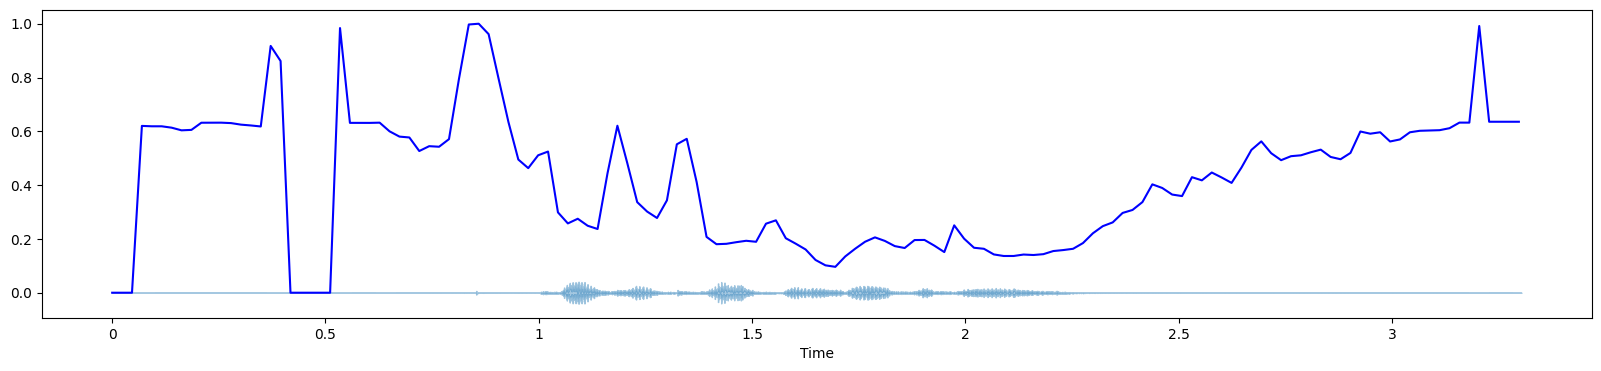

In [85]:
# Computing the time variable for visualization
plt.figure(figsize=(20,4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# print(t)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
# print(normalize(spectral_centroids))

Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

NameError: name 't' is not defined

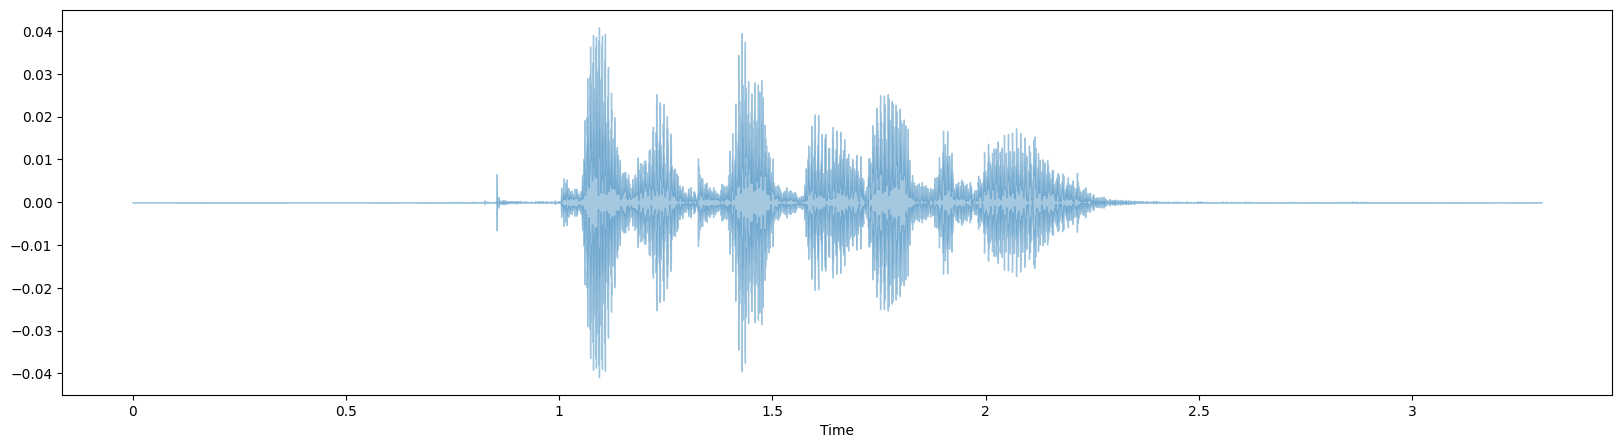

In [78]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='g')
plt.grid()

Mel-frequency cepstral coefficients (MFCCs)
The information of the rate of change in spectral bands of a signal is given by its cepstrum. A cepstrum is basically a spectrum of the log of the spectrum of the time signal. 
The resulting spectrum is neither in the frequency domain nor in the time domain
he Mel-Frequency Cepstral Coefficients (MFCCs) are nothing but the coefficients that make up the mel-frequency cepstrum.
This feature is one of the most important method to extract a feature of an audio signal and is used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.

(20, 143)


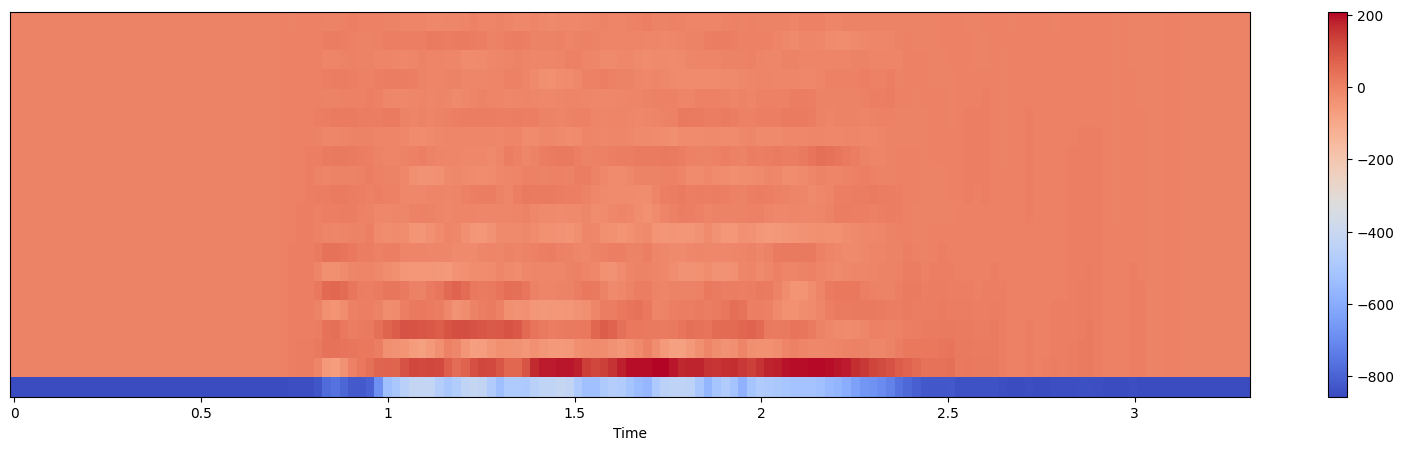

In [79]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()

By printing the shape of mfccs you get how many mfccs are calculated on how many frames. The first value represents the number of mfccs calculated and another value represents a number of frames available.

In [80]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 2.6676204e-08 -2.6676204e-08 -1.3338102e-08  2.0007153e-08
 -2.6676204e-08  0.0000000e+00  0.0000000e+00 -3.3345255e-09
 -2.0007153e-08 -1.6672628e-09 -6.6690511e-09  0.0000000e+00
  0.0000000e+00  6.6690511e-09  6.6690511e-09 -1.3338102e-08
  1.3338102e-08  3.3345255e-09  1.3338102e-08  6.6690511e-09]
[1.0000001  1.         1.0000001  1.         1.0000002  1.0000001
 1.0000001  1.         0.9999999  1.0000001  1.0000001  0.99999976
 1.0000002  1.         0.9999999  0.9999999  1.0000001  0.9999999
 1.0000001  1.        ]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


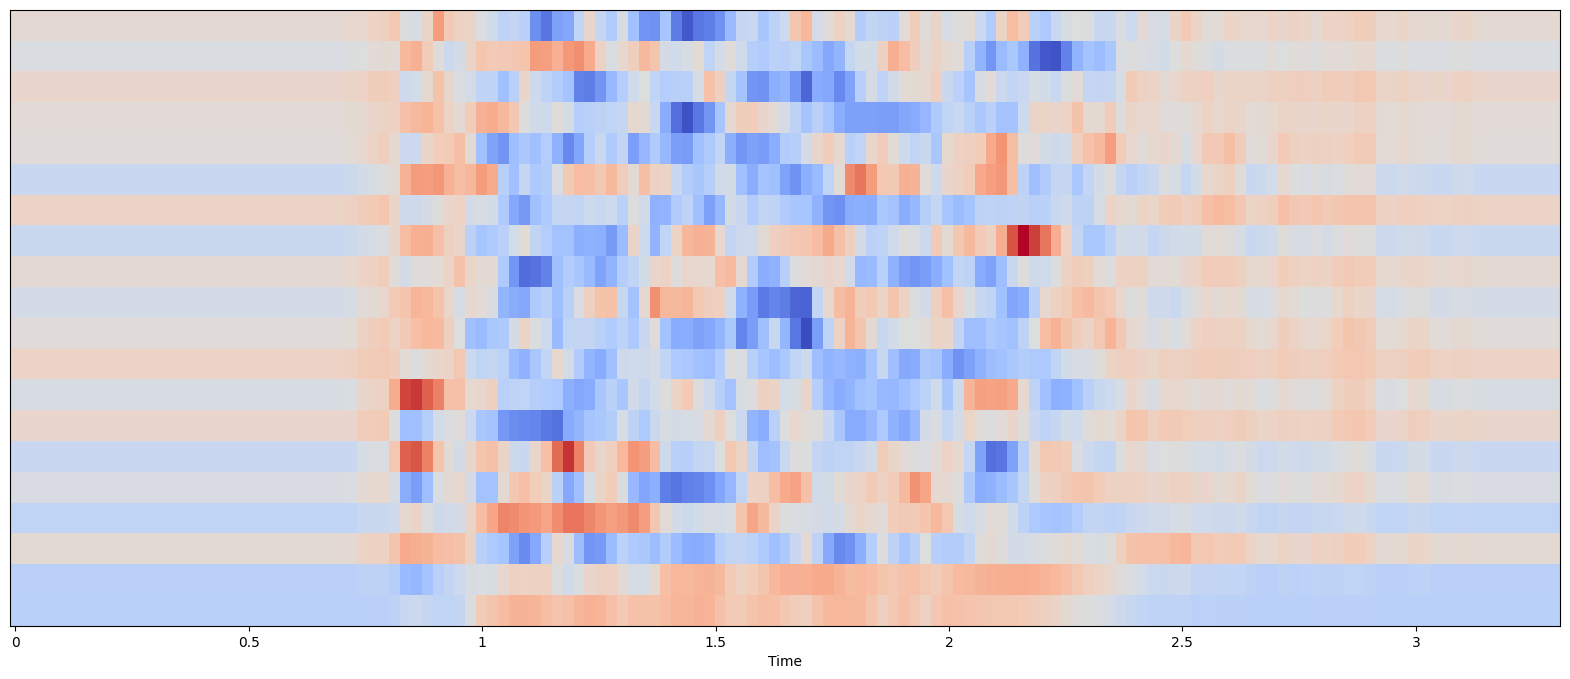

In [81]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

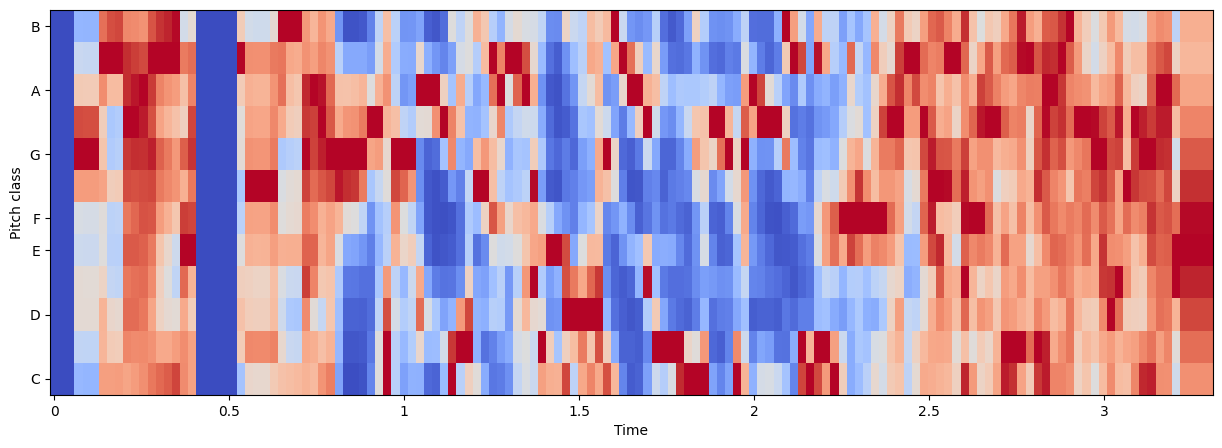

In [82]:
chromagram = librosa.feature.chroma_stft(y=x, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')

The chroma feature is a descriptor, which represents the tonal content of a musical audio signal in a condensed form.